In [2]:
import os
import sys
import random as rd
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [49]:
X = []
y = []
couleur = [50,200]
for i in range(500):
    n = rd.randint(0,1)
    bg_color = np.array([couleur[n],couleur[n],couleur[n]]).reshape([1, 1, 3])
    image = np.ones([128, 128, 3], dtype=np.uint8)
    image = image * bg_color.astype(np.uint8)
    X.append(image)
    y.append(n)
    

In [171]:
X = []
y = []
size_image = 128
couleur = [40,130]
for i in range(500):
    n = rd.randint(0,1)
    c = [couleur[n],couleur[n],couleur[n]]
    bg_color = np.array([240,240,240]).reshape([1, 1, 3])
    image = np.ones([size_image, size_image, 3], dtype=np.uint8)
    image = image * bg_color.astype(np.uint8)
    cv2.circle(image, (int(size_image/2), int(size_image/2)), int(size_image/4), c, -1)
    X.append(image)
    y.append(n)

In [11]:
cv2.circle(image, (x, y), s, color, -1)

NameError: name 'x' is not defined

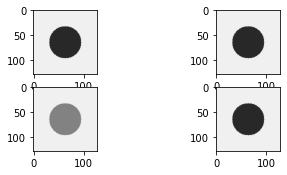

In [172]:
plt.subplot(3,2,1)
plt.imshow(X[3])
plt.subplot(3,2,2)
plt.imshow(X[4])
plt.subplot(3,2,3)
plt.imshow(X[5])
plt.subplot(3,2,4)
plt.imshow(X[6])

    

In [20]:
len(X) , len(y)

(500, 500)

In [21]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [174]:
len(X_train), len(X_test),len(y_train), len(y_test)

(375, 125, 375, 125)

In [175]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical

X_train=np.asarray(X_train) / 255
X_test=np.asarray(X_test) /255
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)


In [176]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [177]:
#trainx2.shape , trainy2.shape , testx2.shape , testy2.shape
print('DIMENSION X TRAIN ' + str(X_train.shape))
print('DIMENSION X TEST ' + str(X_test.shape))
print('DIMENSION Y TRAIN ' + str(y_train.shape))
print('DIMENSION Y TEST ' + str(y_test.shape))

DIMENSION X TRAIN (375, 128, 128, 3)
DIMENSION X TEST (125, 128, 128, 3)
DIMENSION Y TRAIN (375, 2)
DIMENSION Y TEST (125, 2)


In [178]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.15.0


In [179]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten

#construction d'un RNN convolutif
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(size_image,size_image,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 2)               

In [183]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten

#construction d'un RNN convolutif
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(size_image,size_image,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)             

In [149]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [122]:
type(len(X_train))

int

In [184]:
#choix de l'algo d'apprentissage
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Apprentissage du modele
history = model2.fit(X_train, y_train, epochs=25, batch_size=16,validation_data=(X_test, y_test))#,callbacks=[early])
#evaluation du (modele)
test_loss2, test_acc2 = model2.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc2)

Train on 375 samples, validate on 125 samples
Epoch 1/25
375/375 [==============================] - 17s 46ms/sample - loss: 2.0377 - acc: 0.7387 - val_loss: 1.9690 - val_acc: 0.5280
Epoch 2/25
375/375 [==============================] - 16s 42ms/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 3.1068 - val_acc: 0.5280
Epoch 3/25
375/375 [==============================] - 16s 42ms/sample - loss: 8.2390e-06 - acc: 1.0000 - val_loss: 3.3382 - val_acc: 0.5280
Epoch 4/25
375/375 [==============================] - 16s 43ms/sample - loss: 2.6398e-06 - acc: 1.0000 - val_loss: 3.0422 - val_acc: 0.5280
Epoch 5/25
375/375 [==============================] - 16s 42ms/sample - loss: 2.0879e-06 - acc: 1.0000 - val_loss: 2.8738 - val_acc: 0.5280
Epoch 6/25
375/375 [==============================] - 16s 43ms/sample - loss: 1.5879e-06 - acc: 1.0000 - val_loss: 2.7610 - val_acc: 0.5280
Epoch 7/25
375/375 [==============================] - 16s 42ms/sample - loss: 1.1492e-06 - acc: 1.0000 - val_loss: 2.6104 

Model 2 (plus complex):
stagne jusqu'a lepoch 22 puis atteint 1 d'acc 
Probleme simple avec un model compliqué il reste bloqué dans un minimum local 
7 Millions de param
layer en plus : batch_normalization_13

Model 1 : moins complex mais plus adapté au probleme donc il apprend bcp plus vite 

In [ ]:
#[40,130] acc = 0.416

In [130]:
import pandas as pd
logs = pd.DataFrame(history.history)
logs

,loss,acc,val_loss,val_acc
0,1.020431e-07,1.0,4.737546,0.456
1,0.000000e+00,1.0,4.936100,0.456
2,0.000000e+00,1.0,4.918628,0.456
3,0.000000e+00,1.0,4.871624,0.456
4,0.000000e+00,1.0,4.696815,0.456
5,0.000000e+00,1.0,4.559310,0.456
6,0.000000e+00,1.0,4.454909,0.456
7,0.000000e+00,1.0,4.360376,0.456
8,0.000000e+00,1.0,4.220773,0.456
9,0.000000e+00,1.0,3.911433,0.456


In [128]:
def plot_courb(X,Y,Y2,title,xlabel,ylabel,legendLoc):
    plt.plot(Y)
    plt.plot(Y2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['train','val'],loc=legendLoc)
    #to get a clean curve
    plt.xlim(xmin=0.0, xmax=max(X))
    plt.show()

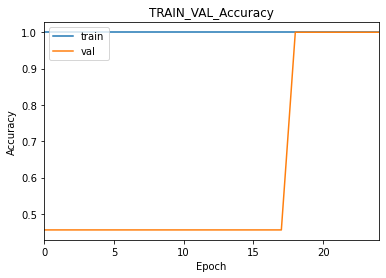

In [131]:
plot_courb(logs.index,logs["acc"],logs["val_acc"],'TRAIN_VAL_Accuracy', 'Epoch', 'Accuracy', 'upper left')

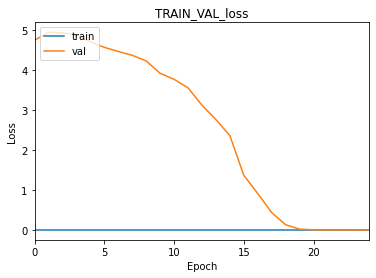

In [132]:
plot_courb(logs.index,logs["loss"],logs["val_loss"],'TRAIN_VAL_loss', 'Epoch', 'Loss', 'upper left')

In [133]:
res = model2.predict(X_test)
res

array([[2.9980785e-10, 1.0000000e+00],
       [9.9999809e-01, 1.9163347e-06],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.9163347e-06],
       [2.9980785e-10, 1.0000000e+00],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.9163347e-06],
       [2.9980785e-10, 1.0000000e+00],
       [9.9999809e-01, 1.9163347e-06],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.9163347e-06],
       [2.9980785e-10, 1.0000000e+00],
       [2.9980785e-10, 1.0000000e+00],
       [9.9999809e-01, 1.9163347e-06],
       [9.9999809e-01, 1.

In [99]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [20]:
couleur = [50,200]
n = rd.randint(0,1)
bg_color = np.array([couleur[n],couleur[n],couleur[n]]).reshape([1, 1, 3])
image = np.ones([28, 28, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)